In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import datasets

In [2]:
# 加载鸢尾花数据集
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df['label'] = iris.target
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# 加载鸢尾花数据集
x = iris.data
y = iris.target

# 加载鸢是三分类，将它转为二分类
y = np.array([1 if i == 1 else 0 for i in y])
# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

x_train,y_train

(array([[4.6, 3.4, 1.4, 0.3],
        [5. , 3. , 1.6, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [5.8, 2.6, 4. , 1.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.1, 3.3, 1.7, 0.5],
        [5. , 3.2, 1.2, 0.2],
        [6.5, 2.8, 4.6, 1.5],
        [7.9, 3.8, 6.4, 2. ],
        [6.1, 3. , 4.9, 1.8],
        [5.4, 3. , 4.5, 1.5],
        [6.4, 2.7, 5.3, 1.9],
        [5.7, 2.9, 4.2, 1.3],
        [7.7, 3.8, 6.7, 2.2],
        [6.5, 3.2, 5.1, 2. ],
        [5.8, 2.7, 3.9, 1.2],
        [4.6, 3.6, 1. , 0.2],
        [6.9, 3.1, 5.4, 2.1],
        [6.7, 3.3, 5.7, 2.1],
        [6.3, 2.8, 5.1, 1.5],
        [5.5, 4.2, 1.4, 0.2],
        [4.4, 3.2, 1.3, 0.2],
        [5.8, 2.7, 5.1, 1.9],
        [5.4, 3.9, 1.7, 0.4],
        [5.5, 3.5, 1.3, 0.2],
        [5. , 3.5, 1.6, 0.6],
        [6.9, 3.1, 4.9, 1.5],
        [6.5, 3. , 5.8, 2.2],
        [6.7, 3.3, 5.7, 2.5],
        [6.1, 2.6, 5.6, 1.4],
        [5.4, 3.7, 1.5, 0.2],
        [6. , 3.4, 4.5, 1.6],
        [5.9, 3.2, 4.8, 1.8],
        [4

In [4]:
class Model:
    def __init__(self):
        self.w = 0                  #系数
        self.b = 0                  #截距
        self.trainSet = 0           #训练集特征
        self.label = 0              #训练集标签
        self.learning_rate = None   #学习率
        self.n_iters = None         #实际迭代次数
        self.accurancy = None       #准确率
        self.tol = 1.0e-4           #停止迭代的容忍度
        self.llList = []            #记录似然值的列表

    def train(self, x, y, method, n_iters=1000,  learning_rate=0.01):
        self.trainSet = x
        self.label = y
        # 梯度下降
        if method.lower() == "gradient":
            self.__train_gradient(n_iters, learning_rate)
        elif method.lower() == "newton":
            # 拟牛顿法
            self.__train_newton(n_iters)

    #求p(y=1|x)以及似然值LL
    def PVandLLV(self, X, Y, W):
        wx = np.dot(X, W.T)
        p_value = np.exp(wx) / (1 + np.exp(wx))
        LLarray = -1.*np.multiply(Y, wx) + np.log(1 + np.exp(wx))
        return p_value, LLarray.sum()

    def __calGradient(self, X, Y, Ypre):
        """calculate Gradient Matrix"""
        Gw = -1.*np.multiply((Y - Ypre), X).sum(axis=0)
        return Gw

    def __calHessian(self, X, Ypre):
        """calculate Hessian Matrix"""
        Hw = np.dot(np.dot(X.T, np.dot(np.diag(Ypre.reshape(-1)), np.diag(1-Ypre.reshape(-1)))), X)
        #为了更直观的理解，展示下拆解开求解的方法
        #Hw = np.zeros((X.shape[1], X.shape[1]))
        #for i in range(n_samples):
        #    xxt = np.dot(X[i,:].reshape(-1,1),X[i,:].reshape(1,-1))
        #    Hw += xxt*Ypre[i]*(1-Ypre[i])
        return Hw

    #训练，梯度下降法
    def __train_gradient(self, n_iters, learning_rate):
        n_samples, n_features = self.trainSet.shape
        X = self.trainSet
        y = self.label
        #合并w和b，在X尾部添加一列全是1的特征
        X2 = np.hstack((X, np.ones((n_samples, 1))))
        #将y转置变为(n_samples,1)的矩阵
        Y = np.expand_dims(y, axis=1)
        #初始化特征系数W
        W = np.zeros((1, n_features+1))
        #初始化误差，更新前后的误差之差，训练次数
        Ypreprob, LL0 = self.PVandLLV(X2, Y, W)
        self.llList.append(LL0)
        deltaLL = np.inf
        n = 0
        while (n<n_iters) and (LL0>self.tol) and (abs(deltaLL)>self.tol):
            #计算梯度，更新W
            gra = self.__calGradient(X2, Y, Ypreprob)
            W = W - learning_rate*gra/n_samples
            #计算更新后的误差，并留下来
            Ypreprob, LL1 = self.PVandLLV(X2, Y, W)
            deltaLL = LL0 - LL1
            LL0 = LL1
            self.llList.append(LL0)
            n += 1
        self.n_iters = n
        self.w = W.flatten()[:-1]
        self.b = W.flatten()[-1]
        Ypre = np.argmax(np.column_stack((1-Ypreprob,Ypreprob)), axis=1)
        self.accurancy = sum(Ypre==y)/n_samples
        print("第{}次停止迭代，似然值为{}，准确率为{}".format(self.n_iters, self.llList[-1], self.accurancy))
        print("w:{};\nb:{}".format(self.w, self.b))
        return

    #训练，牛顿法
    def __train_newton(self, n_iters):
        n_samples, n_features = self.trainSet.shape
        X = self.trainSet
        y = self.label
        #合并w和b，在X尾部添加一列全是1的特征
        X2 = np.hstack((X, np.ones((n_samples, 1))))
        #将y转置变为(n_samples,1)的矩阵
        Y = np.expand_dims(y, axis=1)
        #初始化特征系数W
        W = np.zeros((1, n_features+1))
        #初始化误差，更新前后的误差之差，训练次数
        Ypreprob, LL0 = self.PVandLLV(X2, Y, W)
        self.llList.append(LL0)
        deltaLL = np.inf
        n = 0
        while (n<n_iters) and (LL0>self.tol) and (abs(deltaLL)>self.tol):
            Gw = self.__calGradient(X2, Y, Ypreprob)
            Hw = self.__calHessian(X2, Ypreprob)
            W = W - np.dot(Gw, np.linalg.pinv(Hw))
            #计算更新后的误差，并留下来
            Ypreprob, LL1 = self.PVandLLV(X2, Y, W)
            deltaLL = LL0 - LL1
            LL0 = LL1
            self.llList.append(LL0)
            n += 1
        self.n_iters = n
        self.w = W.flatten()[:-1]
        self.b = W.flatten()[-1]
        Ypre = np.argmax(np.column_stack((1-Ypreprob,Ypreprob)), axis=1)
        self.accurancy = sum(Ypre==y)/n_samples
        print("第{}次停止迭代，似然值为{}，准确率为{}".format(self.n_iters, self.llList[-1], self.accurancy))
        print("w:{};\nb:{}".format(self.w, self.b))
        return

第5000次停止迭代，似然值为75.31738724356728，准确率为0.7266666666666667
w:[ 0.61122286 -2.19682136  0.79743441 -2.23838548];
b:1.9134859258843746


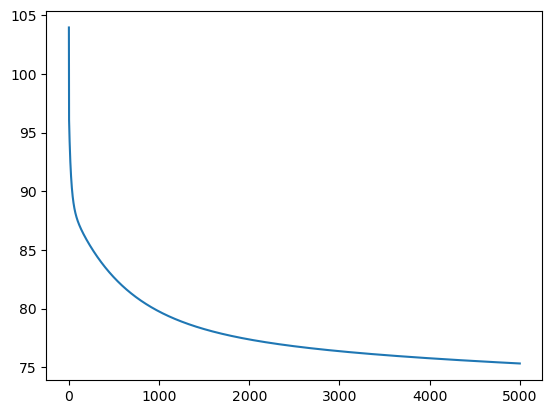

In [5]:
 #自编的梯度下降法进行拟合
logit_gd = Model()
logit_gd.train(x, y, method="gradient", n_iters=5000, learning_rate=0.05)
plt.plot(range(logit_gd.n_iters+1), logit_gd.llList)
plt.show()